# Embeddings Demonstration

This notebook illustrates the use of embeddings for natural language processing tasks.

## What are Embeddings?

Embeddings are numerical representations (vectors) of text, words, or other data that capture semantic meaning. Similar items have similar embeddings, making them useful for:
- Semantic search
- Recommendation systems
- Clustering and classification
- Text similarity comparison


## Setup

First, let's install and import the necessary libraries. We'll use:
- `sentence-transformers` for pre-trained embedding models
- `numpy` for numerical operations
- `matplotlib` and `seaborn` for visualization
- `sklearn` for dimensionality reduction and metrics


In [10]:
# Install required packages (uncomment if needed)
# !pip install sentence-transformers numpy matplotlib seaborn scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")


✓ Libraries imported successfully!


## 1. Creating Embeddings

Let's start by loading a pre-trained embedding model. We'll use the `all-MiniLM-L6-v2` model, which is:
- Lightweight and fast
- Good for general-purpose sentence embeddings
- Produces 384-dimensional vectors


In [11]:
# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentences
sentences = [
    "The cat sits on the mat",
    "A feline rests on a rug",
    "The dog plays in the park",
    "Python is a programming language",
    "Machine learning models need data"
]

# Generate embeddings
embeddings = model.encode(sentences)

print(f"Number of sentences: {len(sentences)}")
print(f"Embedding shape: {embeddings.shape}")
print(f"Each sentence is represented by a {embeddings.shape[1]}-dimensional vector")
print(f"\nFirst embedding (first 10 dimensions):\n{embeddings[0][:10]}")


Number of sentences: 5
Embedding shape: (5, 384)
Each sentence is represented by a 384-dimensional vector

First embedding (first 10 dimensions):
[ 0.13489066 -0.03206331 -0.02033524  0.035901   -0.02833313  0.0415021
  0.03315871  0.03660563  0.00861659  0.03763951]


## 2. Semantic Similarity

One of the key uses of embeddings is measuring how similar two pieces of text are. We use **cosine similarity** to measure the angle between vectors:
- 1.0 = identical meaning
- 0.0 = unrelated
- -1.0 = opposite meaning


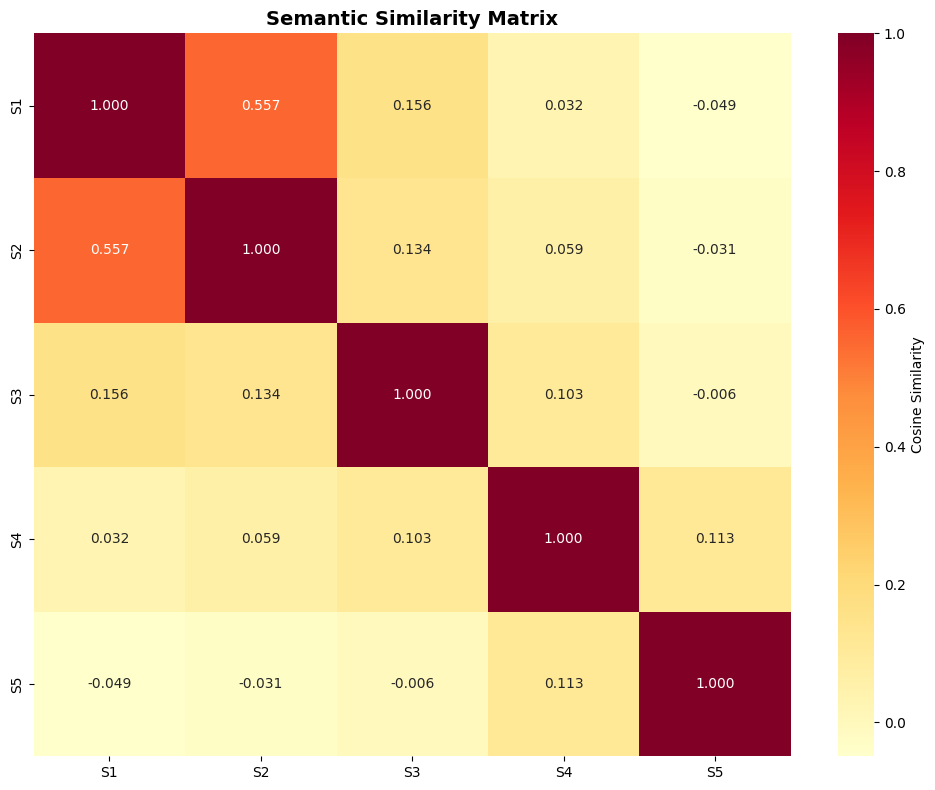


Sentence Pairs and Similarities:
----------------------------------------------------------------------
'The cat sits on the mat' 
  vs 
'A feline rests on a rug'
  Similarity: 0.557

'The cat sits on the mat' 
  vs 
'The dog plays in the park'
  Similarity: 0.156

'The cat sits on the mat' 
  vs 
'Python is a programming language'
  Similarity: 0.032

'The cat sits on the mat' 
  vs 
'Machine learning models need data'
  Similarity: -0.049

'A feline rests on a rug' 
  vs 
'The dog plays in the park'
  Similarity: 0.134

'A feline rests on a rug' 
  vs 
'Python is a programming language'
  Similarity: 0.059

'A feline rests on a rug' 
  vs 
'Machine learning models need data'
  Similarity: -0.031

'The dog plays in the park' 
  vs 
'Python is a programming language'
  Similarity: 0.103

'The dog plays in the park' 
  vs 
'Machine learning models need data'
  Similarity: -0.006

'Python is a programming language' 
  vs 
'Machine learning models need data'
  Similarity: 0.113



In [12]:
# Calculate pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='YlOrRd',
            xticklabels=[f"S{i+1}" for i in range(len(sentences))],
            yticklabels=[f"S{i+1}" for i in range(len(sentences))],
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Semantic Similarity Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print sentence pairs with their similarities
print("\nSentence Pairs and Similarities:")
print("-" * 70)
for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        sim = similarity_matrix[i][j]
        print(f"'{sentences[i]}' \n  vs \n'{sentences[j]}'")
        print(f"  Similarity: {sim:.3f}\n")


## 3. Visualizing Embeddings

Embeddings are high-dimensional (384 dimensions in our case), which makes them hard to visualize directly. We can use **PCA (Principal Component Analysis)** to reduce them to 2D or 3D for visualization.


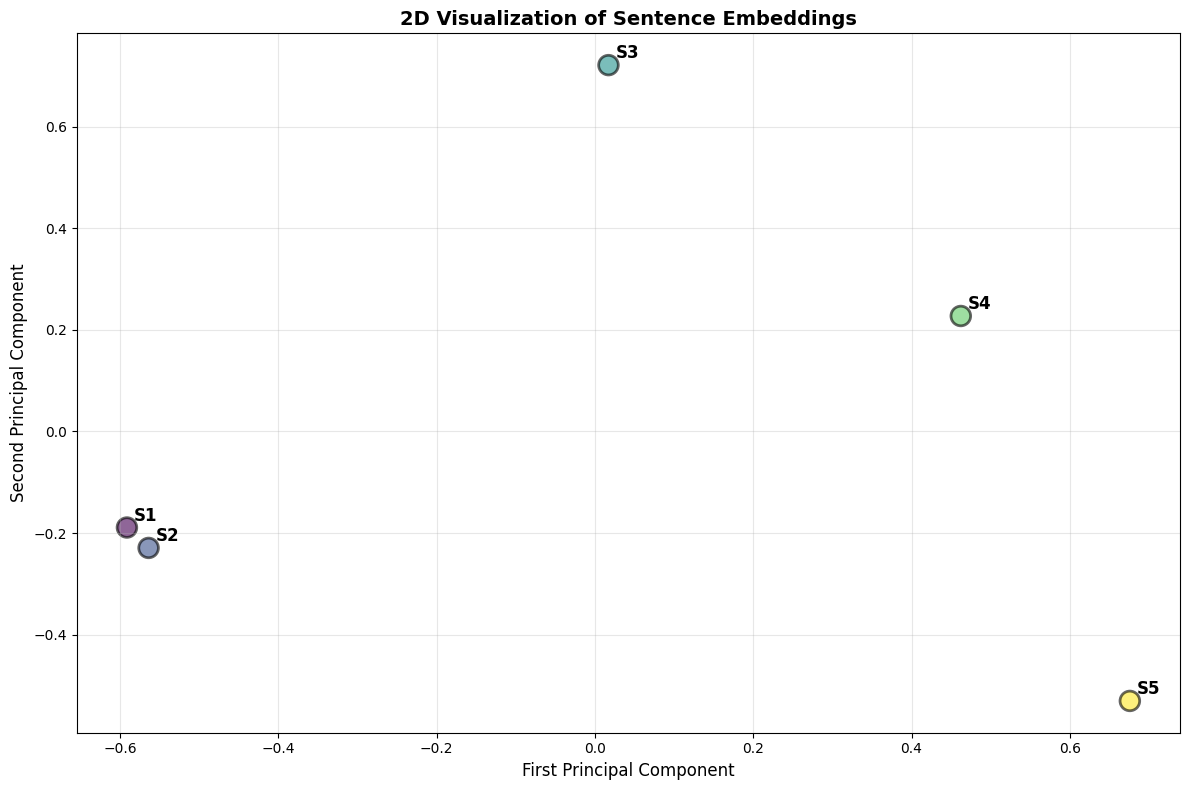

Legend:
S1: The cat sits on the mat
S2: A feline rests on a rug
S3: The dog plays in the park
S4: Python is a programming language
S5: Machine learning models need data


In [13]:
# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Create visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     s=200, c=range(len(sentences)), cmap='viridis', 
                     alpha=0.6, edgecolors='black', linewidth=2)

# Add labels for each point
for i, sentence in enumerate(sentences):
    plt.annotate(f"S{i+1}", 
                xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('2D Visualization of Sentence Embeddings', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the legend
print("Legend:")
for i, sentence in enumerate(sentences):
    print(f"S{i+1}: {sentence}")


## 4. Practical Use Case: Semantic Search

Let's build a simple semantic search engine that finds the most relevant documents based on a query.


In [14]:
# Create a knowledge base of documents
documents = [
    "Python is a high-level programming language known for its simplicity",
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing helps computers understand human language",
    "Computer vision enables machines to interpret visual information",
    "Data science combines statistics, programming, and domain expertise",
    "Cloud computing provides on-demand access to computing resources",
    "Blockchain is a distributed ledger technology",
    "Quantum computing uses quantum mechanics for computation",
    "Cybersecurity protects systems from digital attacks"
]

# Encode all documents
document_embeddings = model.encode(documents)

def semantic_search(query, top_k=3):
    """
    Perform semantic search to find the most relevant documents
    """
    # Encode the query
    query_embedding = model.encode([query])
    
    # Calculate similarities
    similarities = cosine_similarity(query_embedding, document_embeddings)[0]
    
    # Get top-k results
    top_indices = np.argsort(similarities)[::-1][:top_k]
    
    # Display results
    print(f"Query: '{query}'")
    print("=" * 80)
    for rank, idx in enumerate(top_indices, 1):
        print(f"\nRank {rank}: (Similarity: {similarities[idx]:.4f})")
        print(f"  {documents[idx]}")
    print("=" * 80)
    
    return top_indices, similarities[top_indices]

# Test the semantic search
print("Test 1: AI-related query\n")
semantic_search("How do machines learn from data?", top_k=3)


Test 1: AI-related query

Query: 'How do machines learn from data?'

Rank 1: (Similarity: 0.5394)
  Machine learning is a subset of artificial intelligence

Rank 2: (Similarity: 0.5169)
  Computer vision enables machines to interpret visual information

Rank 3: (Similarity: 0.4084)
  Natural language processing helps computers understand human language


(array([1, 4, 3]), array([0.539423  , 0.51693785, 0.40840906], dtype=float32))

In [15]:
print("\nTest 2: Security-related query\n")
semantic_search("How to protect against hackers?", top_k=3)



Test 2: Security-related query

Query: 'How to protect against hackers?'

Rank 1: (Similarity: 0.5422)
  Cybersecurity protects systems from digital attacks

Rank 2: (Similarity: 0.1362)
  Blockchain is a distributed ledger technology

Rank 3: (Similarity: 0.1032)
  Computer vision enables machines to interpret visual information


(array([9, 7, 4]), array([0.5422267 , 0.13624744, 0.10324457], dtype=float32))

In [16]:
print("\nTest 3: Programming-related query\n")
semantic_search("What's the best language for beginners?", top_k=3)



Test 3: Programming-related query

Query: 'What's the best language for beginners?'

Rank 1: (Similarity: 0.4572)
  Python is a high-level programming language known for its simplicity

Rank 2: (Similarity: 0.2576)
  Natural language processing helps computers understand human language

Rank 3: (Similarity: 0.0970)
  Data science combines statistics, programming, and domain expertise


(array([0, 3, 5]), array([0.45718384, 0.2575868 , 0.09702481], dtype=float32))

## 5. Clustering Documents by Similarity

Let's visualize how documents cluster together based on their semantic meaning.


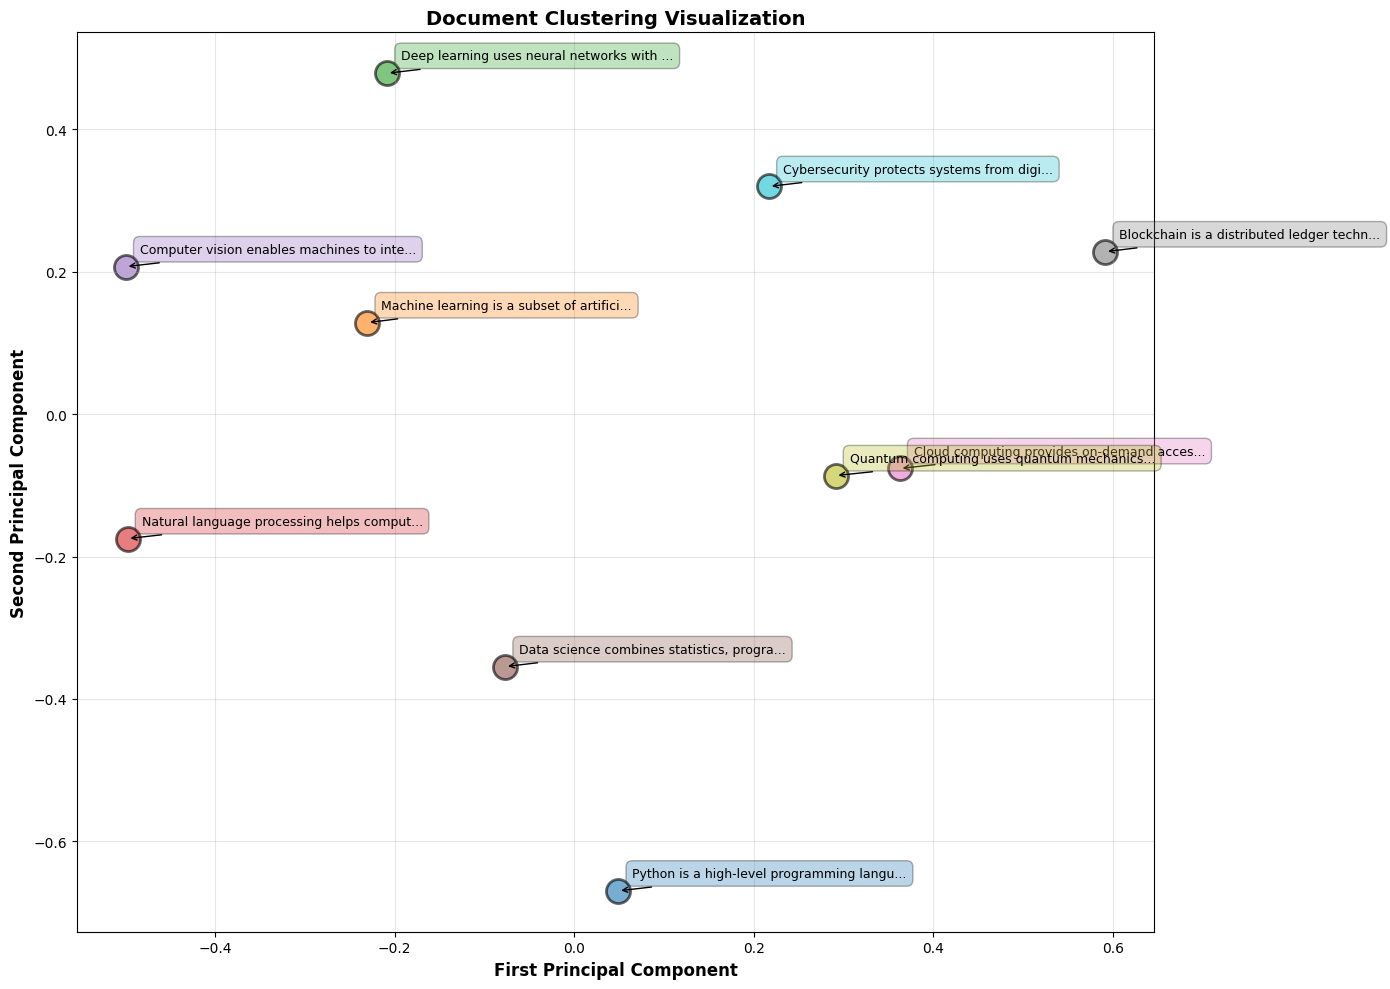

In [17]:
# Reduce document embeddings to 2D
pca_docs = PCA(n_components=2)
doc_embeddings_2d = pca_docs.fit_transform(document_embeddings)

# Create a more detailed visualization
plt.figure(figsize=(14, 10))
colors = plt.cm.tab10(np.linspace(0, 1, len(documents)))

for i, (doc, color) in enumerate(zip(documents, colors)):
    x, y = doc_embeddings_2d[i]
    plt.scatter(x, y, s=300, c=[color], alpha=0.6, edgecolors='black', linewidth=2)
    
    # Add document labels (truncated for readability)
    label = doc[:40] + "..." if len(doc) > 40 else doc
    plt.annotate(label, 
                xy=(x, y),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.xlabel('First Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Second Principal Component', fontsize=12, fontweight='bold')
plt.title('Document Clustering Visualization', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Understanding Similarity Scores

Let's compare different text pairs to understand what similarity scores mean in practice.


In [18]:
# Define text pairs with different levels of similarity
text_pairs = [
    ("The weather is sunny today", "It's a beautiful day with clear skies"),
    ("I love eating pizza", "Pizza is my favorite food"),
    ("The stock market crashed", "Investors lost money in the market"),
    ("I love eating pizza", "The weather is sunny today"),
    ("Machine learning is fascinating", "The sunset was beautiful yesterday"),
    ("Paris is the capital of France", "France's capital city is Paris")
]

# Calculate and display similarities
print("Text Pair Similarity Analysis")
print("=" * 80)

for text1, text2 in text_pairs:
    emb1 = model.encode([text1])
    emb2 = model.encode([text2])
    similarity = cosine_similarity(emb1, emb2)[0][0]
    
    # Determine relationship
    if similarity > 0.7:
        relationship = "Very Similar (Paraphrases/Same Topic)"
    elif similarity > 0.4:
        relationship = "Somewhat Related"
    else:
        relationship = "Unrelated"
    
    print(f"\n📝 Text 1: '{text1}'")
    print(f"📝 Text 2: '{text2}'")
    print(f"🔍 Similarity: {similarity:.4f} - {relationship}")
    print("-" * 80)


Text Pair Similarity Analysis

📝 Text 1: 'The weather is sunny today'
📝 Text 2: 'It's a beautiful day with clear skies'
🔍 Similarity: 0.5341 - Somewhat Related
--------------------------------------------------------------------------------

📝 Text 1: 'I love eating pizza'
📝 Text 2: 'Pizza is my favorite food'
🔍 Similarity: 0.8414 - Very Similar (Paraphrases/Same Topic)
--------------------------------------------------------------------------------

📝 Text 1: 'The stock market crashed'
📝 Text 2: 'Investors lost money in the market'
🔍 Similarity: 0.6705 - Somewhat Related
--------------------------------------------------------------------------------

📝 Text 1: 'I love eating pizza'
📝 Text 2: 'The weather is sunny today'
🔍 Similarity: 0.0763 - Unrelated
--------------------------------------------------------------------------------

📝 Text 1: 'Machine learning is fascinating'
📝 Text 2: 'The sunset was beautiful yesterday'
🔍 Similarity: 0.0867 - Unrelated
-----------------------------

## 7. Key Takeaways and Applications

### What we learned:
1. **Embeddings** convert text into numerical vectors that capture semantic meaning
2. **Cosine similarity** measures how related two pieces of text are
3. **Dimensionality reduction** (PCA) helps visualize high-dimensional embeddings
4. **Semantic search** finds relevant documents based on meaning, not just keywords

### Real-world Applications:
- **Search Engines**: Finding relevant content based on user queries
- **Recommendation Systems**: Suggesting similar items or content
- **Chatbots**: Understanding user intent and matching to responses
- **Document Classification**: Automatically categorizing text
- **Duplicate Detection**: Finding similar or duplicate content
- **Question Answering**: Matching questions to answers in a knowledge base

### Next Steps:
- Try different embedding models (e.g., OpenAI, Cohere, or larger models)
- Experiment with multilingual embeddings
- Build a vector database for large-scale semantic search
- Fine-tune embeddings for domain-specific tasks


# Additional example: Finding odd one out
print("Finding the Odd One Out\n")
print("=" * 80)

test_groups = [
    ["apple", "banana", "orange", "car", "grape"],
    ["Python", "Java", "C++", "hamburger", "JavaScript"],
    ["run", "walk", "jog", "sleep", "sprint"]
]

for group in test_groups:
    # Get embeddings for all items
    group_embeddings = model.encode(group)
    
    # Calculate average similarity of each item to all others
    avg_similarities = []
    for i in range(len(group)):
        # Calculate similarity to all other items
        sims = []
        for j in range(len(group)):
            if i != j:
                sim = cosine_similarity([group_embeddings[i]], [group_embeddings[j]])[0][0]
                sims.append(sim)
        avg_similarities.append(np.mean(sims))
    
    # The one with lowest average similarity is the outlier
    outlier_idx = np.argmin(avg_similarities)
    
    print(f"\nGroup: {group}")
    print(f"Outlier: '{group[outlier_idx]}' (avg similarity: {avg_similarities[outlier_idx]:.3f})")
    print("-" * 80)


---

## 8. Real-World Application: Banking Fraud Detection

Embeddings are powerful for fraud detection in banking because they can:
1. **Identify similar transaction patterns** - Find transactions with similar descriptions that might indicate coordinated fraud
2. **Detect anomalies** - Flag transactions that are unusual compared to normal patterns
3. **Match to known fraud patterns** - Compare new transactions against known fraudulent activity
4. **Cluster suspicious activities** - Group related fraudulent transactions together

Let's explore how embeddings can help catch banking fraud!


### Example 1: Detecting Similar Fraudulent Transactions

Fraudsters often use similar transaction descriptions or patterns. Embeddings can help identify these clusters of suspicious activity.


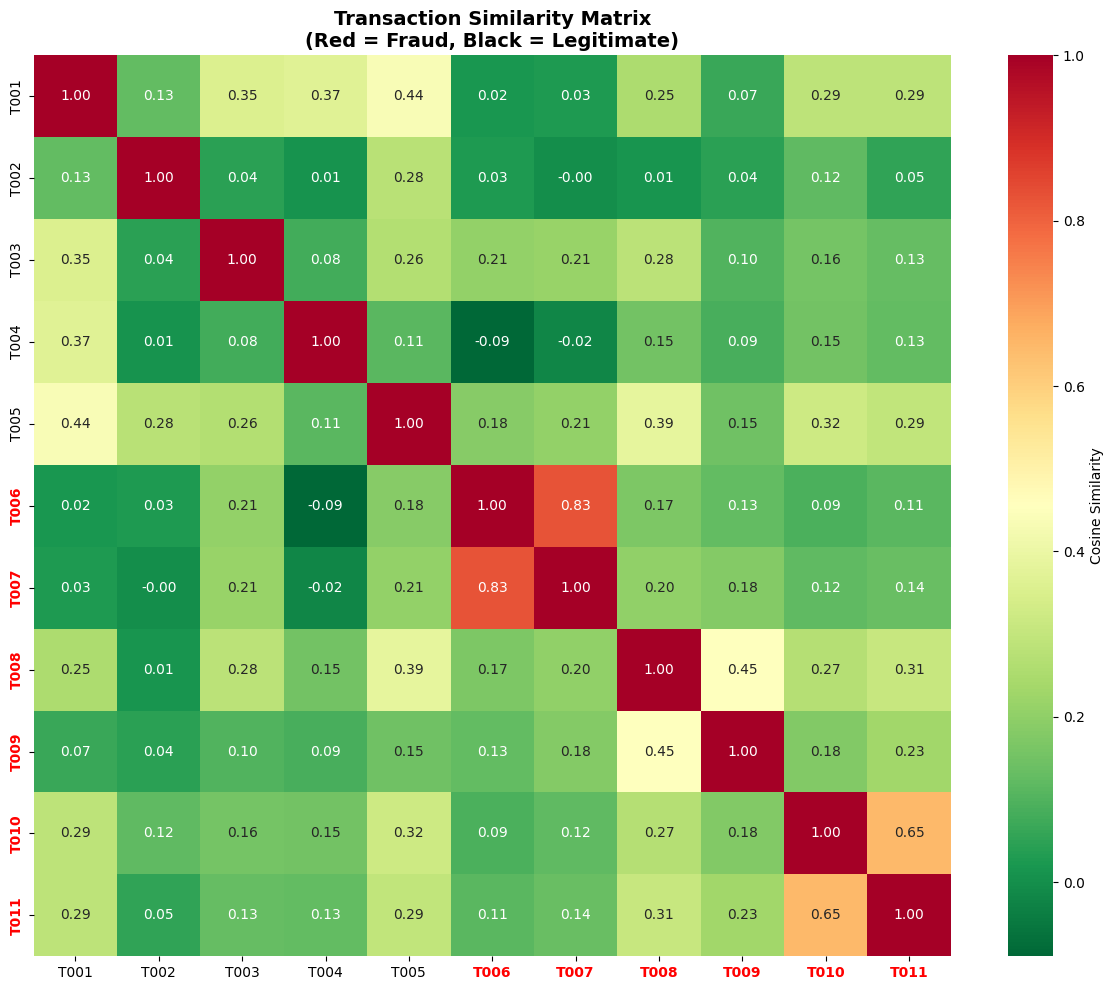

Fraud Pattern Detection

🚨 T006: Wire transfer to offshore account in Cayman Islands
   Amount: $5000.00
   Similar fraudulent patterns found:
   - T007 (similarity: 0.826): International wire transfer to Caribbean offshore bank

🚨 T007: International wire transfer to Caribbean offshore bank
   Amount: $4800.00
   Similar fraudulent patterns found:
   - T006 (similarity: 0.826): Wire transfer to offshore account in Cayman Islands

🚨 T010: Gift card purchase of 20 prepaid cards
   Amount: $2000.00
   Similar fraudulent patterns found:
   - T011 (similarity: 0.651): Multiple gift cards purchased in single transaction

🚨 T011: Multiple gift cards purchased in single transaction
   Amount: $1950.00
   Similar fraudulent patterns found:
   - T010 (similarity: 0.651): Gift card purchase of 20 prepaid cards


In [19]:
# Sample transaction descriptions
transactions = [
    # Legitimate transactions
    {"id": "T001", "description": "Grocery purchase at Whole Foods Market", "amount": 87.50, "label": "legitimate"},
    {"id": "T002", "description": "Monthly subscription to Netflix streaming service", "amount": 15.99, "label": "legitimate"},
    {"id": "T003", "description": "Gas station purchase at Shell", "amount": 45.00, "label": "legitimate"},
    {"id": "T004", "description": "Restaurant dinner at Olive Garden", "amount": 62.30, "label": "legitimate"},
    {"id": "T005", "description": "Online purchase from Amazon marketplace", "amount": 124.99, "label": "legitimate"},
    
    # Fraudulent transactions (similar patterns)
    {"id": "T006", "description": "Wire transfer to offshore account in Cayman Islands", "amount": 5000.00, "label": "fraud"},
    {"id": "T007", "description": "International wire transfer to Caribbean offshore bank", "amount": 4800.00, "label": "fraud"},
    {"id": "T008", "description": "Cryptocurrency purchase from unknown wallet address", "amount": 3500.00, "label": "fraud"},
    {"id": "T009", "description": "Bitcoin transaction to unverified crypto wallet", "amount": 3200.00, "label": "fraud"},
    {"id": "T010", "description": "Gift card purchase of 20 prepaid cards", "amount": 2000.00, "label": "fraud"},
    {"id": "T011", "description": "Multiple gift cards purchased in single transaction", "amount": 1950.00, "label": "fraud"},
]

# Extract descriptions for embedding
descriptions = [t["description"] for t in transactions]

# Generate embeddings for all transactions
transaction_embeddings = model.encode(descriptions)

# Calculate similarity matrix
fraud_similarity = cosine_similarity(transaction_embeddings)

# Visualize the similarity matrix
plt.figure(figsize=(12, 10))
ax = sns.heatmap(fraud_similarity, 
                 annot=True, 
                 fmt='.2f', 
                 cmap='RdYlGn_r',
                 xticklabels=[t["id"] for t in transactions],
                 yticklabels=[t["id"] for t in transactions],
                 cbar_kws={'label': 'Cosine Similarity'})

# Color-code the labels
for i, t in enumerate(transactions):
    if t["label"] == "fraud":
        ax.get_xticklabels()[i].set_color('red')
        ax.get_yticklabels()[i].set_color('red')
        ax.get_xticklabels()[i].set_weight('bold')
        ax.get_yticklabels()[i].set_weight('bold')

plt.title('Transaction Similarity Matrix\n(Red = Fraud, Black = Legitimate)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Find clusters of similar fraudulent transactions
print("Fraud Pattern Detection")
print("=" * 80)
for i, t1 in enumerate(transactions):
    if t1["label"] == "fraud":
        similar_frauds = []
        for j, t2 in enumerate(transactions):
            if i != j and t2["label"] == "fraud" and fraud_similarity[i][j] > 0.5:
                similar_frauds.append((t2["id"], t2["description"], fraud_similarity[i][j]))
        
        if similar_frauds:
            print(f"\n🚨 {t1['id']}: {t1['description']}")
            print(f"   Amount: ${t1['amount']:.2f}")
            print(f"   Similar fraudulent patterns found:")
            for fraud_id, desc, sim in similar_frauds:
                print(f"   - {fraud_id} (similarity: {sim:.3f}): {desc}")


### Example 2: Anomaly Detection in Transaction Patterns

By analyzing a customer's normal transaction behavior, we can detect unusual transactions that might indicate account compromise or fraud.


In [20]:
# Customer's typical transaction history (normal behavior)
normal_transactions = [
    "Morning coffee at Starbucks",
    "Grocery shopping at local supermarket",
    "Gas station fill-up",
    "Restaurant lunch with coworkers",
    "Online shopping for household items",
    "Monthly gym membership payment",
    "Electric bill payment",
    "Grocery delivery from Instacart",
    "Pharmacy prescription purchase",
    "Movie tickets for weekend entertainment"
]

# New transactions to evaluate (one is suspicious)
new_transactions = [
    "Coffee and breakfast at local cafe",  # Normal
    "Wire transfer to international gambling site",  # Suspicious!
    "Grocery purchase at Trader Joe's",  # Normal
]

# Encode all transactions
normal_embeddings = model.encode(normal_transactions)
new_embeddings = model.encode(new_transactions)

# Calculate how similar each new transaction is to the normal pattern
print("Anomaly Detection Results")
print("=" * 80)

for i, new_txn in enumerate(new_transactions):
    # Calculate similarity to all normal transactions
    similarities = cosine_similarity([new_embeddings[i]], normal_embeddings)[0]
    avg_similarity = np.mean(similarities)
    max_similarity = np.max(similarities)
    
    # Determine if it's anomalous (low similarity to normal patterns)
    is_anomaly = avg_similarity < 0.3  # Threshold
    
    print(f"\n{'🚨 ALERT' if is_anomaly else '✓ NORMAL'}: {new_txn}")
    print(f"  Average similarity to normal behavior: {avg_similarity:.3f}")
    print(f"  Max similarity to any normal transaction: {max_similarity:.3f}")
    
    if is_anomaly:
        print(f"  ⚠️  This transaction is ANOMALOUS and should be flagged for review!")
        print(f"  Reason: Low similarity to customer's typical spending patterns")
    else:
        print(f"  ✓ This transaction matches normal spending patterns")
    
    # Show most similar normal transaction
    most_similar_idx = np.argmax(similarities)
    print(f"  Most similar to: '{normal_transactions[most_similar_idx]}' (similarity: {similarities[most_similar_idx]:.3f})")
    print("-" * 80)


Anomaly Detection Results

🚨 ALERT: Coffee and breakfast at local cafe
  Average similarity to normal behavior: 0.249
  Max similarity to any normal transaction: 0.739
  ⚠️  This transaction is ANOMALOUS and should be flagged for review!
  Reason: Low similarity to customer's typical spending patterns
  Most similar to: 'Morning coffee at Starbucks' (similarity: 0.739)
--------------------------------------------------------------------------------

🚨 ALERT: Wire transfer to international gambling site
  Average similarity to normal behavior: 0.081
  Max similarity to any normal transaction: 0.170
  ⚠️  This transaction is ANOMALOUS and should be flagged for review!
  Reason: Low similarity to customer's typical spending patterns
  Most similar to: 'Electric bill payment' (similarity: 0.170)
--------------------------------------------------------------------------------

✓ NORMAL: Grocery purchase at Trader Joe's
  Average similarity to normal behavior: 0.309
  Max similarity to any n

### Example 3: Matching Against Known Fraud Patterns

Banks maintain databases of known fraud patterns. Embeddings can quickly match new transactions against this database to catch fraud in real-time.


In [21]:
# Database of known fraud patterns
known_fraud_patterns = [
    "Wire transfer to high-risk country with no business relationship",
    "Multiple small transactions just below reporting threshold (structuring)",
    "Cryptocurrency purchase followed by immediate transfer to unknown wallet",
    "Purchase of large amounts of gift cards or prepaid debit cards",
    "Unusual international wire transfer to tax haven jurisdiction",
    "ATM withdrawals in multiple countries within short time period",
    "Online gambling deposits to unlicensed offshore sites",
    "Peer-to-peer payment to known money mule account",
    "Purchase from merchant previously flagged for fraud",
    "Multiple failed login attempts followed by large transfer"
]

# Encode the fraud pattern database
fraud_pattern_embeddings = model.encode(known_fraud_patterns)

# New incoming transactions to screen
incoming_transactions = [
    "Payment to Netflix subscription service",
    "Transfer to cryptocurrency exchange then immediate external withdrawal",
    "Deposit at local ATM branch",
    "Purchase of $1,980 in gift cards from multiple retailers",
    "International wire to business partner in Germany",
    "Multiple ATM cash withdrawals in 3 different countries today"
]

# Screen transactions against fraud database
print("Real-Time Fraud Screening")
print("=" * 80)

def screen_transaction(transaction_desc, threshold=0.6):
    """Screen a transaction against known fraud patterns"""
    txn_embedding = model.encode([transaction_desc])
    similarities = cosine_similarity(txn_embedding, fraud_pattern_embeddings)[0]
    max_similarity = np.max(similarities)
    most_similar_idx = np.argmax(similarities)
    
    return max_similarity, most_similar_idx, max_similarity >= threshold

for txn in incoming_transactions:
    similarity, pattern_idx, is_flagged = screen_transaction(txn, threshold=0.55)
    
    print(f"\n{'🚨 FRAUD ALERT' if is_flagged else '✓ CLEARED'}: {txn}")
    print(f"  Match confidence: {similarity:.3f}")
    print(f"  Most similar fraud pattern:")
    print(f"    '{known_fraud_patterns[pattern_idx]}'")
    
    if is_flagged:
        print(f"  🛑 ACTION: BLOCK transaction and request manual review")
        print(f"  📋 Suggested review: Verify customer intent and beneficiary")
    else:
        print(f"  ✓ STATUS: Transaction approved")
    print("-" * 80)

# Summary statistics
print("\n" + "=" * 80)
print("SCREENING SUMMARY")
flagged_count = sum([1 for txn in incoming_transactions if screen_transaction(txn, threshold=0.55)[2]])
print(f"Total transactions screened: {len(incoming_transactions)}")
print(f"Transactions flagged: {flagged_count}")
print(f"Transactions cleared: {len(incoming_transactions) - flagged_count}")
print(f"Flag rate: {flagged_count/len(incoming_transactions)*100:.1f}%")


Real-Time Fraud Screening

✓ CLEARED: Payment to Netflix subscription service
  Match confidence: 0.424
  Most similar fraud pattern:
    'Peer-to-peer payment to known money mule account'
  ✓ STATUS: Transaction approved
--------------------------------------------------------------------------------

🚨 FRAUD ALERT: Transfer to cryptocurrency exchange then immediate external withdrawal
  Match confidence: 0.617
  Most similar fraud pattern:
    'Cryptocurrency purchase followed by immediate transfer to unknown wallet'
  🛑 ACTION: BLOCK transaction and request manual review
  📋 Suggested review: Verify customer intent and beneficiary
--------------------------------------------------------------------------------

✓ CLEARED: Deposit at local ATM branch
  Match confidence: 0.523
  Most similar fraud pattern:
    'ATM withdrawals in multiple countries within short time period'
  ✓ STATUS: Transaction approved
-------------------------------------------------------------------------------

### Example 4: Visualizing Fraud Clusters

Let's visualize how legitimate and fraudulent transactions cluster differently in the embedding space. This helps fraud analysts understand patterns at a glance.


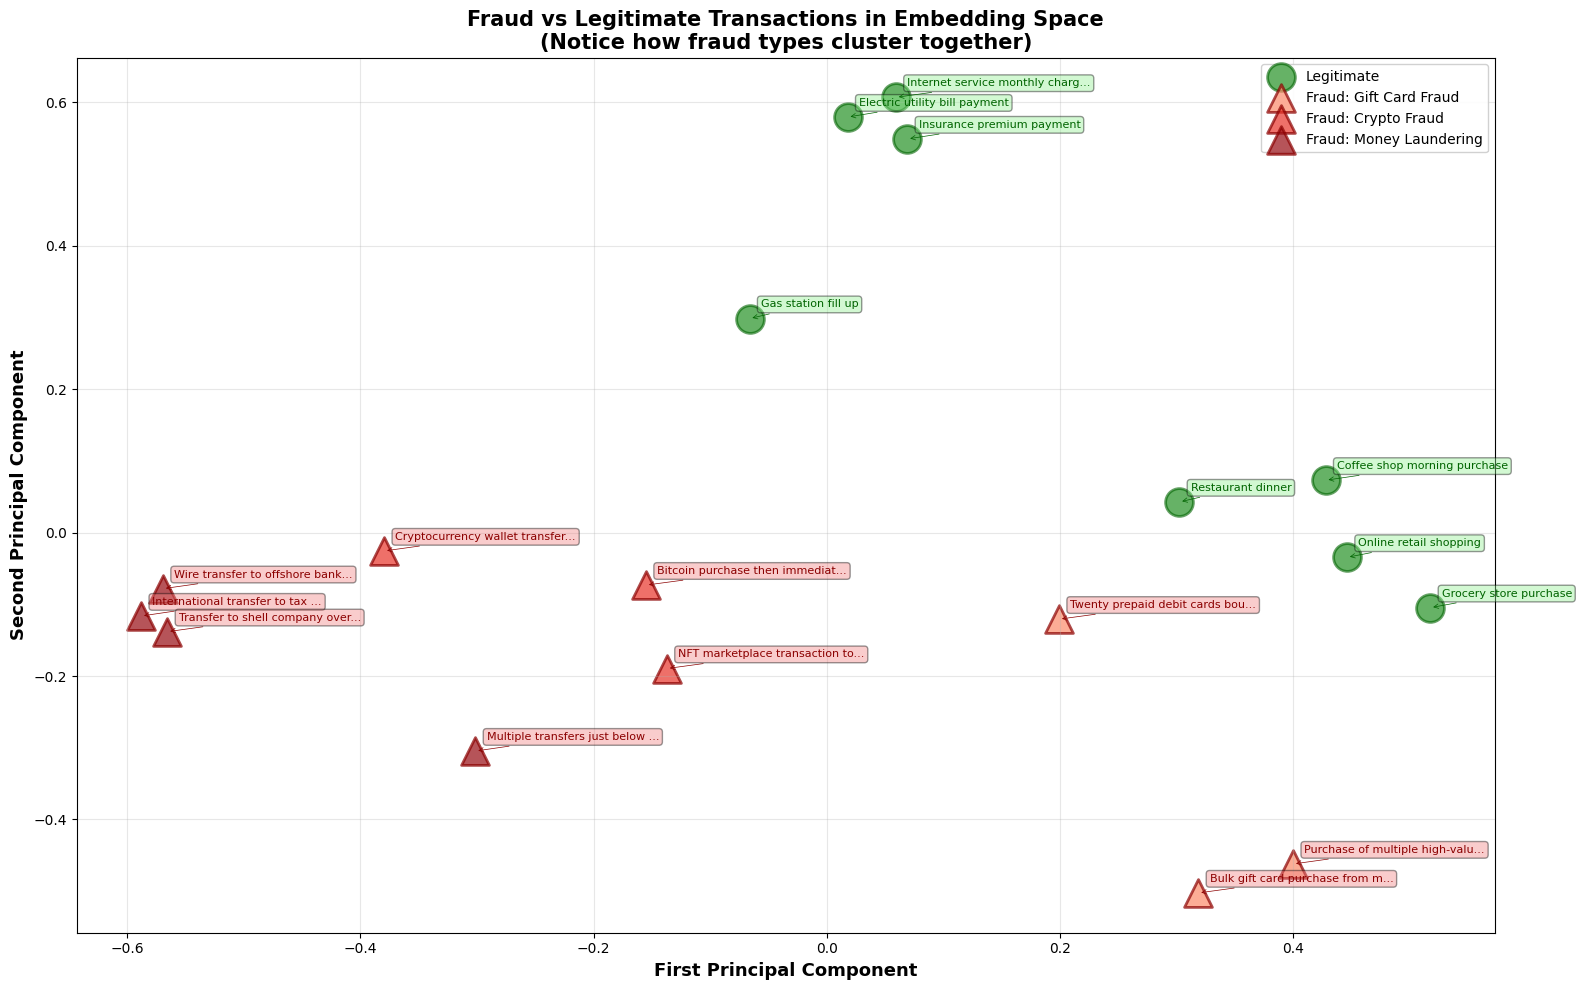


KEY INSIGHTS FOR FRAUD DETECTION:
✓ Legitimate transactions cluster together (green circles)
✓ Different fraud types form distinct clusters (red triangles)
✓ Similar fraud patterns are close in embedding space
✓ This allows automated detection of new fraud matching known patterns
✓ Transactions far from both clusters warrant manual investigation


In [22]:
# Extended dataset with more examples
all_transactions = [
    # Legitimate everyday transactions
    {"desc": "Grocery store purchase", "type": "legitimate", "category": "Daily spending"},
    {"desc": "Gas station fill up", "type": "legitimate", "category": "Daily spending"},
    {"desc": "Restaurant dinner", "type": "legitimate", "category": "Daily spending"},
    {"desc": "Coffee shop morning purchase", "type": "legitimate", "category": "Daily spending"},
    {"desc": "Online retail shopping", "type": "legitimate", "category": "Daily spending"},
    {"desc": "Electric utility bill payment", "type": "legitimate", "category": "Bills"},
    {"desc": "Internet service monthly charge", "type": "legitimate", "category": "Bills"},
    {"desc": "Insurance premium payment", "type": "legitimate", "category": "Bills"},
    
    # Money laundering patterns
    {"desc": "Wire transfer to offshore bank account", "type": "fraud", "category": "Money Laundering"},
    {"desc": "International transfer to tax haven", "type": "fraud", "category": "Money Laundering"},
    {"desc": "Transfer to shell company overseas", "type": "fraud", "category": "Money Laundering"},
    {"desc": "Multiple transfers just below $10,000 threshold", "type": "fraud", "category": "Money Laundering"},
    
    # Crypto fraud
    {"desc": "Cryptocurrency wallet transfer to anonymous address", "type": "fraud", "category": "Crypto Fraud"},
    {"desc": "Bitcoin purchase then immediate external transfer", "type": "fraud", "category": "Crypto Fraud"},
    {"desc": "NFT marketplace transaction to unverified wallet", "type": "fraud", "category": "Crypto Fraud"},
    
    # Gift card fraud
    {"desc": "Purchase of multiple high-value gift cards", "type": "fraud", "category": "Gift Card Fraud"},
    {"desc": "Twenty prepaid debit cards bought together", "type": "fraud", "category": "Gift Card Fraud"},
    {"desc": "Bulk gift card purchase from multiple stores", "type": "fraud", "category": "Gift Card Fraud"},
]

# Encode all transactions
all_descs = [t["desc"] for t in all_transactions]
all_embeddings = model.encode(all_descs)

# Reduce to 2D for visualization
pca_fraud = PCA(n_components=2)
embeddings_2d_fraud = pca_fraud.fit_transform(all_embeddings)

# Create visualization
plt.figure(figsize=(16, 10))

# Separate legitimate and fraud transactions
legit_indices = [i for i, t in enumerate(all_transactions) if t["type"] == "legitimate"]
fraud_indices = [i for i, t in enumerate(all_transactions) if t["type"] == "fraud"]

# Plot legitimate transactions
legit_x = embeddings_2d_fraud[legit_indices, 0]
legit_y = embeddings_2d_fraud[legit_indices, 1]
plt.scatter(legit_x, legit_y, s=400, c='green', alpha=0.6, 
           edgecolors='darkgreen', linewidth=2, label='Legitimate', marker='o')

# Plot fraud transactions with different colors by category
fraud_categories = list(set([t["category"] for t in all_transactions if t["type"] == "fraud"]))
fraud_colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(fraud_categories)))

for cat_idx, category in enumerate(fraud_categories):
    cat_indices = [i for i, t in enumerate(all_transactions) 
                   if t["type"] == "fraud" and t["category"] == category]
    cat_x = embeddings_2d_fraud[cat_indices, 0]
    cat_y = embeddings_2d_fraud[cat_indices, 1]
    plt.scatter(cat_x, cat_y, s=400, c=[fraud_colors[cat_idx]], alpha=0.7,
               edgecolors='darkred', linewidth=2, label=f'Fraud: {category}', marker='^')

# Add labels for each point
for i, t in enumerate(all_transactions):
    short_desc = t["desc"][:30] + "..." if len(t["desc"]) > 30 else t["desc"]
    color = 'darkgreen' if t["type"] == "legitimate" else 'darkred'
    plt.annotate(short_desc, 
                xy=(embeddings_2d_fraud[i, 0], embeddings_2d_fraud[i, 1]),
                xytext=(8, 8), textcoords='offset points',
                fontsize=8, color=color,
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='lightgreen' if t["type"] == "legitimate" else 'lightcoral',
                         alpha=0.4),
                arrowprops=dict(arrowstyle='->', color=color, lw=0.5))

plt.xlabel('First Principal Component', fontsize=13, fontweight='bold')
plt.ylabel('Second Principal Component', fontsize=13, fontweight='bold')
plt.title('Fraud vs Legitimate Transactions in Embedding Space\n(Notice how fraud types cluster together)', 
         fontsize=15, fontweight='bold')
plt.legend(loc='best', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print insights
print("\n" + "=" * 80)
print("KEY INSIGHTS FOR FRAUD DETECTION:")
print("=" * 80)
print("✓ Legitimate transactions cluster together (green circles)")
print("✓ Different fraud types form distinct clusters (red triangles)")
print("✓ Similar fraud patterns are close in embedding space")
print("✓ This allows automated detection of new fraud matching known patterns")
print("✓ Transactions far from both clusters warrant manual investigation")
print("=" * 80)


### Why Embeddings Work Well for Banking Fraud Detection

**Advantages:**

1. **Semantic Understanding**: Embeddings understand meaning, not just keywords
   - "Wire to offshore account" and "Transfer to tax haven" are recognized as similar
   - Works even if fraudsters change exact wording

2. **Fast Real-Time Screening**: Once embeddings are created, comparison is very fast
   - Can screen millions of transactions per second
   - Critical for real-time fraud prevention

3. **Adaptable to New Patterns**: Easy to add new fraud patterns to the database
   - Just encode the new pattern description
   - No need to retrain complex rule engines

4. **Reduces False Positives**: Better than simple keyword matching
   - "Gift card for birthday present" vs "Purchase of 50 gift cards"
   - Context matters and embeddings capture it

5. **Multilingual Support**: Works across languages
   - Same fraud pattern in different languages will have similar embeddings
   - Important for international banking

**Real-World Implementation:**

Banks typically combine embeddings with:
- **Transaction amounts** - Large amounts increase risk
- **Customer history** - Deviation from normal behavior
- **Network analysis** - Links between accounts
- **Time patterns** - Unusual timing or velocity
- **Geographic data** - Location anomalies

The embedding approach provides a powerful foundation for modern fraud detection systems!
